# **Notre projet d'apprentissage automatique : reconnaissance d'image de pokémon**

# Introduction


L'univers de Pokémon, avec sa riche variété de créatures, offre un terrain fertile pour l'exploration de techniques d'intelligence artificielle, en particulier dans le domaine de la reconnaissance d'images. Notre projet se situe à l'intersection de la passion pour cet univers et l'ambition d'appliquer les principes de l'apprentissage automatique à des problèmes concrets et engageants. L'objectif spécifique de ce projet est de développer un modèle capable d'identifier le type principal d'un Pokémon à partir d'une image. Cette tâche, bien que semblant simple en surface, pose d'importantes difficultés techniques dues à la diversité des formes, des couleurs et des contextes dans lesquels ces créatures peuvent apparaître.

Les Pokémon, créatures emblématiques de la franchise du même nom, présentent une riche variété de types qui influencent leurs capacités et interactions lors des combats et autres interactions. Les types incluent, mais ne sont pas limités à, l'eau, le feu, la plante, l'électrique, et le psy, chacun avec ses propres faiblesses.

Au total, on compte 1008 Pokémon, chacun avec une apparence qui lui est propre et avec un type ou un double type parmi les 18 présents dans l’univers de Pokémon. En effet, ce qui caractérise un Pokémon c’est bien sûr son apparence mais aussi le type auquel il appartient, par exemple la mascotte de la franchise Pikachu est seulement de type Électrique mais d’autres Pokémon comme Dracaufeu possède un double type étant par exemple de type vol et feu. Alors certains types sont faciles à reconnaitre grâce à l’apparence du Pokemon : Rouge pour le type Feu , des ailes pour le type Vol ou jaune pour le type Electrique. Cependant certains types deviennent plus complexes à déterminer comme le type Fée ou bien faire la différence entre le type Roche et Sol. Alors notre tâche lors de ce projet va être d’identifier à partir d’une image d’un Pokémon son type principal. Lorsque je parle de type principal je fais référence au premier type du Pokémon. Reprenons l’exemple de Dracaufeu : il est de type Feu et Vol donc son type principal sera Feu.

Notre jeu de données va alors consister à prendre les images des 1008 Pokémon.
Comme nous avons conscience de la taille plutôt petite de notre dataset, on pourra aussi prendre comme jeu de données les images des Pokémon du jeu Pokémon Fusion. Ici, dans ce jeu on dispose de plus de 100 000 images de Pokémon différents possédant tous 1 ou 2 types. Ce second jeu de données sera utilisé dans un second temps pour entraîner nos modèles et comparer leurs performances entre les 2 jeux de données.


Notre problématique de Machine Learning : La reconnaissance de types de Pokémon

Notre projet de Machine Learning s'est concentré sur un problème de classification d'images impliquant de traiter plusieurs défis inhérents. Premièrement, la diversité des représentations des Pokémon, même au sein d'un même type, nécessite un modèle capable de généraliser à partir de caractéristiques visuelles parfois subtiles. Deuxièmement, la présence de Pokémon avec des doubles types nous conduit directement à un problème multi-label. Cependant nous allons ramener ce problème à un problème multiclasse où notre objectif va être de déterminer le type principal d’un Pokémon sans considérer son 2nd type.

Le jeu de données que nous avons utilisé contient des images de Pokémon ainsi que leurs types correspondants  et nous disposons d’un dataset de l’ordre du millier d'éléments. Cependant, ce jeu de données présente un déséquilibre notable entre les classes, avec certaines classes comprenant beaucoup plus de Pokémon que d'autres. Par exemple, la classe "Eau" peut contenir jusqu'à 120 Pokémon, tandis qu'une autre classe comme "Spectre" n'en contient que 20. Cette disparité constitue un des défis significatifs associés à notre problème de classification multiclasse.


Notre objectif principal était de développer un modèle capable de prendre une image de Pokémon en entrée et de prédire son type, en se limitant au premier type attribué à chaque Pokémon.

Pour aborder ce problème complexe, nous avons appliqué plusieurs techniques et méthodes de Machine Learning. Tout d'abord, nous avons utilisé l'encodage one-hot pour traiter les 18 classes de types de Pokémon, permettant ainsi de représenter chaque classe sous forme de vecteur de binaires. De plus, nous avons mis en place différentes méthodes de tests et de validations afin d’évaluer les performances de nos modèles de manière robuste.

Nous avons également comparé différentes approches de Machine Learning pour déterminer lequel serait le plus approprié pour notre tâche comme la régression logistique ou les réseaux de neurones.

Dans une quête du modèle le plus performant nous avons utilisé l'approche One-Versus-All (OvA) pour entraîner des modèles de classification binaire pour chaque classe par rapport à toutes les autres avant d’opter pour l'approche One-Versus-One (OvO), dans laquelle nous avons entraîné des modèles pour chaque paire de classes possibles. Cette approche s'est avérée plus efficace pour résoudre notre problème, en exploitant les informations spécifiques à chaque paire de classes pour obtenir des prédictions plus précises.
En résumé, notre projet a nécessité une méthodologie rigoureuse et une exploration approfondie des différentes techniques de Machine Learning pour surmonter les défis posés par le déséquilibre des classes et pour développer un modèle capable de reconnaître les types de Pokémon avec une précision élevée.



# Importation du Dataset 

Le code ci dessous permet d'importer le dataset, stocké sur google drive car lourd

In [1]:
# Importation des modules de base
import os
import gdown
import pandas as pd
import numpy as np
import zipfile
import cv2
from PIL import Image
from pathlib import Path
import re
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# Importation des modules de prétraitement
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler

# Importation des modules de division des données
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Importation des modules de modèles d'apprentissage automatique
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense,Conv2D, MaxPooling2D

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Importation des modules de métriques
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from tensorflow.keras.metrics import Precision, Recall, Metric



In [12]:
# Téléchargement du csv contenant les types et les noms des pokémons
url_csv = 'https://drive.google.com/uc?id=1Fb2EYHSBG5HMxTPdRanCf5AJ_xdROQNQ'
output_csv = 'dataset.csv'
gdown.download(url_csv, output_csv, quiet=False)

# Téléchargemetn des images
url_zip = 'https://drive.google.com/uc?id=17UgFd4modnT7ukWzW9kXd4zmaBbkN_tD'
output_zip = 'sprites.zip'
gdown.download(url_zip, output_zip, quiet=False)

with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall(".")


# Telecharger fusion
url_csv = 'https://drive.google.com/uc?id=1vy-DUWiBXGbpR-jo1AH5884kgvcgzB_r'
output_csv = 'fusions.csv'
gdown.download(url_csv, output_csv, quiet=False)

# Telecharger CSV
url_zip = 'https://drive.google.com/uc?id=1osHUbIcQhdOeq6b2Gxhi4xzM0wJikK-A'
output_zip = 'spritesFusion.zip'
gdown.download(url_zip, output_zip, quiet=False)



with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall(".")  # Décompresse dans le répertoire courant


Downloading...
From: https://drive.google.com/uc?id=1vy-DUWiBXGbpR-jo1AH5884kgvcgzB_r
To: c:\Users\mathi\Documents\ProjetIA\fusions.csv
100%|██████████| 803/803 [00:00<?, ?B/s] 


'fusions.csv'

In [2]:
# chemin du dossier contenant les images
train_dir = 'sprites/'

train_path = Path(train_dir)

# On créé un dataframe avec le nom et le chemin de chaque image
fichierImages = list(train_path.glob('*.png'))
names = [os.path.split(x)[1] for x in list(train_path.glob('*.png'))]
image_pokemon_df = pd.concat([pd.Series(names, name='Name'), pd.Series(fichierImages, name='Filepath').astype(str)], axis=1)
image_pokemon_df['Name'] = image_pokemon_df['Name'].apply(lambda x: re.sub(r'\.\w+$', '', x)).str.lower()

# On charge le csv contenant les types des pokémons
label_pokemon_df = pd.read_csv('dataset.csv')
label_pokemon_df['Name'] = label_pokemon_df['Name'].str.lower()

# Fusion des deux dataframes
pokemon_df = image_pokemon_df.merge(label_pokemon_df, on='Name')

# Dupliquer les lignes où 'Type 2' n'est pas nul pour entrainer le modèle sur les pokémons ayant deux types
pokemon_df_type2 = pokemon_df[pokemon_df['Type 2'].notna()].copy()

# Remplacer 'Type 1' par 'Type 2' dans les lignes dupliquées
pokemon_df_type2['Type 1'] = pokemon_df_type2['Type 2']

# Concaténer le dataframe original avec les lignes dupliquées
pokemon_df = pd.concat([pokemon_df, pokemon_df_type2])

# Supprimer les colonnes inutiles et renommer les colonnes restantes
pokemon_df = pokemon_df.drop(['Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'], axis=1)
pokemon_df.columns = ['Name', 'Filepath', 'no', 'Type1']

pokemon_df.head()

,Name,Filepath,no,Type1
0,abomasnow,sprites\abomasnow.png,460,Grass
1,abra,sprites\abra.png,63,Psychic
2,absol,sprites\absol.png,359,Dark
3,accelgor,sprites\accelgor.png,617,Bug
4,aerodactyl,sprites\aerodactyl.png,142,Rock


## Statistiques sur le Dataset

C:\Users\mathi\AppData\Local\Temp\ipykernel_16380\1677162581.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=type1_data.index, y='# of pokemon', data=type1_data, palette=bar_colors)
C:\Users\mathi\AppData\Local\Temp\ipykernel_16380\1677162581.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="center")


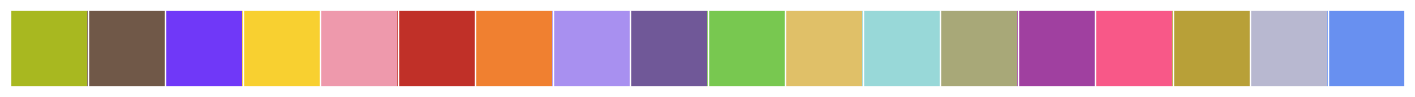

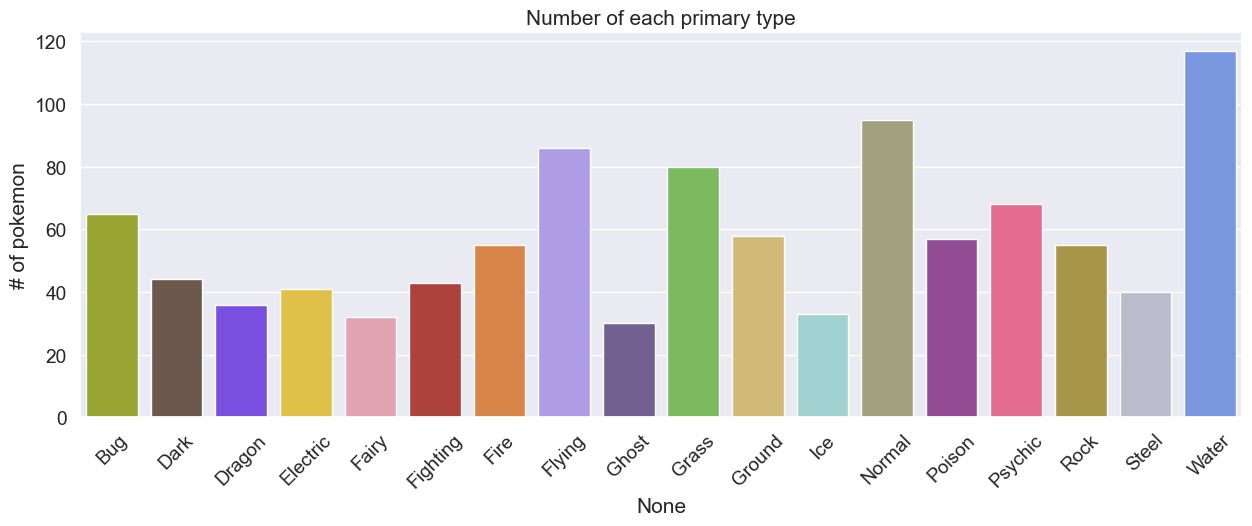

Nous avons un Dataset de 1035 pokémons


In [3]:


custom_colors = {
    'Bug': '#a8b820',
    'Dark': '#705848',
    'Dragon': '#7038f8',
    'Electric': '#f8d030',
    'Fairy': '#ee99ac',
    'Fighting': '#c03028',
    'Fire': '#f08030',
    'Flying': '#a890f0',
    'Ghost': '#705898',
    'Grass': '#78c850',
    'Ground': '#e0c068',
    'Ice': '#98d8d8',
    'Normal': '#a8a878',
    'Poison': '#a040a0',
    'Psychic': '#f85888',
    'Rock': '#b8a038',
    'Steel': '#b8b8d0',
    'Water': '#6890f0'
}

sns.set(font_scale=1.25)
sns.set_palette(sns.color_palette(custom_colors.values()))
sns.palplot(sns.color_palette(custom_colors.values()),size=1)



# find the number of each type of pokemon
type1 = list(custom_colors.keys())
type1_nums = []
for type in type1:
  type1_nums.append(sum(pokemon_df['Type1']==type))
  sumTotal = sum(type1_nums)

type1_data = pd.DataFrame(data=type1_nums, index=type1, columns=['# of pokemon'])

# Créez une liste de couleurs basée sur l'ordre des types dans type1_data
bar_colors = [custom_colors[type] for type in type1_data.index]

plt.figure(figsize=(15,5))
plt.title('Number of each primary type')
ax = sns.barplot(x=type1_data.index, y='# of pokemon', data=type1_data, palette=bar_colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="center")
plt.show()


print(f'Nous avons un Dataset de {sumTotal} pokémons')

# Prétraitement des images et des données

In [4]:

types = pokemon_df['Type1'].unique()

# Encodage One Hot pour le multiClass
types = ['Grass', 'Fire', 'Flying', 'Dragon',"Water","Bug","Poison","Normal","Electric","Ground","Fairy","Ghost","Ice","Rock","Psychic","Fighting","Dark",'Steel']
num_classes = len(types)

oneHotEncoded = {
    types[i]: [0]* i + [1] + [0] * (len(types) - 1 - i) for i in range(num_classes)
}

# On a un dataset global avec tout les pokemons pour pouvoir entrainer plusieurs models
x_global = np.array([filepath for filepath in pokemon_df['Filepath']])
y_global = np.array([oneHotEncoded[type] for type in pokemon_df['Type1']])

# On divise le dataset en un jeu de donnée d'entrainement et un jeu de donnée de test
x_train_glob, x_test_glob, y_train_glob, y_test_glob = train_test_split(x_global, y_global, test_size=0.2, random_state=42)


# On a 153 datasets differents pour pouvoir entrainer les models de types One V One
comboTypes = [(type1, type2) for type1 in types for type2 in types if type1 != type2]

#On récupère tout les modèles uniques
for i in range(len(comboTypes)):
  comboTypes[i] = tuple(sorted(comboTypes[i]))
comboTypes = list(set(comboTypes))
print(f"Nous avons {len(types)} types de pokémons")
print(f"Cela nous donne {len(comboTypes)} combinaisons de types uniques à entrainer pour le One V One")
print(f" et {len(types)} modèles pour le One vs All")

# On initialise un dictionnaire pour stocker les modèles, ce dictionnaire contiendra les données d'entrainement et de test, les scores de précision et de rappel ainsi que le modèle lui-même
# et ce pour chaque combinaison de types afin de pouvoir les comparer et effectuer une prediction finale basée sur tout les modèles
modelsOVO = {f"{type1}_{type2}" : {"model" : None,"dataset": {},'train_set':None,'test_set':None, "accuracy_score":0, "f1_score": 0,"Recall": 0 } for (type1,type2) in comboTypes}

# Pour chaque combinaison de types, on genere un dataset contenant seulement les deux types de pokémons
for combo in comboTypes:
    type1, type2 = combo
    #print(f"On prepare le dataset pour le versus : {type1} et {type2} ")
    comboStr = f"{type1}_{type2}"
    # On génére le dataset contenant les pokémons de 2 types seulement
    df_combo = pokemon_df[(pokemon_df['Type1'] == type1) | (pokemon_df['Type1'] == type2)]
    # et on sauvegarde ce jeu de donné dans un dictionnaire
    modelsOVO[comboStr]['dataset'] = df_combo

modelsOvA = {f"{type1}" : {"model" : None,"dataset": {},'train_set':None,'test_set':None, "accuracy_score":0, "f1_score": 0,"Recall": 0 } for type1 in types}

for type1 in types:

    comboStr = f"{type1}"
    # On génére le dataset contenant tout le dataset original mais lorsque qu'un pokémon n'est pas de ce type on le met en type 0 sinon on met 1
    dfOneVsAll = pokemon_df.copy()
    dfOneVsAll['Type1'] = dfOneVsAll['Type1'].apply(lambda x: 1 if x == type1 else 0)
    # on retire les doublons de ligne entieres pour ne pas avoir de doublons
    dfOneVsAll = dfOneVsAll.drop_duplicates()
    # et on sauvegarde ce jeu de donné dans un dictionnaire
    modelsOvA[comboStr]['dataset'] = dfOneVsAll

print("Les jeux de données sont prêts")


Nous avons 18 types de pokémons
Cela nous donne 153 combinaisons de types uniques à entrainer pour le One V One
 et 18 modèles pour le One vs All
Les jeux de données sont prêts


# Fonctions utiles pour la suite

Executer la cellule

In [ ]:
import math
def show_images(filepaths):
    """
    Affiche les images à partir des chemins de fichiers donnés.
    Args:
    filepaths (list): Liste des chemins de fichiers des images à afficher.
    """
    total_images = len(filepaths)
    num_rows = math.ceil(total_images / 3)  # nous gardons 3 colonnes et ajustons le nombre de lignes
    plt.figure(figsize=(10, num_rows * 3.3))  # ajuste la hauteur de la figure en fonction du nombre de lignes
    count = 0
    for filepath in filepaths:
        try:
            image = mpimg.imread(filepath)
            plt.subplot(num_rows, 3, count + 1)
            plt.imshow(image)
            plt.axis('off')
            count += 1
        except:
            pass
    plt.show()

def load_and_preprocess_image(filepath,flatten=True):
    """
    Charge et prétraite l'image à partir du chemin de fichier donné.
    Args:
        filepath (str): Chemin de fichier de l'image à charger et prétraiter.

    Returns:
        image (numpy.ndarray): Image prétraitée sous forme de tableau numpy.
    """
    image = tf.io.read_file(filepath)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, [128, 128])
    image /= 255.0
    if flatten:
        image = image.numpy().flatten()  # aplatissement de l'image et réassignation du résultat à image
    return image

def training(model, x_train, y_train, x_test, y_test,NN = False):
    """ Entraîne le modèle donné sur les données d'entraînement et évalue ses performances sur les données de test.

    # load and preprocess the images
    Args:
        model: Modèle d'apprentissage automatique à entraîner.
        x_train (numpy.ndarray): Données d'entraînement (images) sous forme de tableau numpy.
        y_train (numpy.ndarray): Étiquettes d'entraînement correspondantes sous forme de tableau numpy.
        x_test (numpy.ndarray): Données de test (images) sous forme de tableau numpy.
        y_test (numpy.ndarray): Étiquettes de test correspondantes sous forme de tableau numpy.

    Returns:
        model: Modèle entraîné.
        accuracy (float): Précision du modèle sur les données de test.
        f1 (float): Score F1 du modèle sur les données de test.
        recall (float): Rappel du modèle sur les données de test.
    """
    if NN:
        # charger et prétraiter les images sans les flatten pour les ANN
        x_train = np.array([load_and_preprocess_image(filepath,False) for filepath in x_train])
        x_test = np.array([load_and_preprocess_image(filepath,False) for filepath in x_test])

    else :
        # charger et prétraiter les images
        x_train = np.array([load_and_preprocess_image(filepath) for filepath in x_train])
        x_test = np.array([load_and_preprocess_image(filepath) for filepath in x_test])

    history = model.fit(x_train, y_train)

    # faire des prédictions
    y_pred = model.predict(x_test)

    if NN:
        accuracy, recall, f1 = history.history['accuracy'][-1], history.history['recall'][-1], history.history['f1_score'][-1]

    else:
        # calculer la précision du modèle
        accuracy = accuracy_score(y_test, y_pred)

        # calculer le score F1 du modèle
        f1 = f1_score(y_test, y_pred)

        # calculer le rappel du modèle
        recall = recall_score(y_test, y_pred)

    return model, accuracy, f1, recall

class F1Score(Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

def CNNModel():
    model = Sequential([
        Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(1, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',"recall", F1Score()])
    return model

def ANNMdel():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(128, 128, 3)),
        Dense(64, activation='relu'),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(1, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', "recall", F1Score()])
    return model

def printScores(nomModel, accuracy, f1, recall):
    print(f"Pour le model {nomModel} on a Précision: {accuracy:.2f} ; Score F1: {f1:.2f} ; Rappel: {recall:.2f}")


baseModels = {
    'KNN': KNeighborsClassifier( n_neighbors=5),
    'DecisionTree': DecisionTreeClassifier( max_depth=5),
    'SVM': SVC( kernel='linear'),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'CNN': CNNModel(),
    'ANN': ANNMdel(),
}

# Code Normal ANN ou CNN + Reflexion

Dans notre projet de détection de type de Pokémon à partir d'images, nous avons envisagé plusieurs approches pour développer un modèle performant. Notre première tentative a consisté à construire un réseau de neurones avec 18 neurones en sortie, chacun correspondant à l'un des 18 types de Pokémon. Malheureusement, dès les premières expérimentations, nous avons remarqué des scores très bas en termes de précision et de rappel. Il était clair que notre modèle ne parvenait pas à apprendre efficacement à partir des données d'entraînement, présentant ainsi des signes d'underfitting.
La principale hypothèse que nous avons formulée pour expliquer ces résultats médiocres était le déséquilibre des classes dans notre ensemble de données. En effet, certaines classes étaient nettement moins représentées que d'autres. Par exemple, le nombre de Pokémon de type "Glace" était très limité par rapport aux autres types. Pour tenter de pallier ce déséquilibre, nous avons décidé d'explorer l'utilisation du K-stratified Cross Validation, une technique permettant de mieux répartir les données d'entraînement et de test tout en tenant compte de la distribution des classes.
Malgré nos efforts pour intégrer le K-stratified Cross Validation, les améliorations de performances obtenues étaient modestes. Nous avons émis l'hypothèse que cette technique n'était peut-être pas suffisamment efficace pour gérer le déséquilibre extrême de certaines classes dans notre ensemble de données. De plus, le faible nombre d'exemples dans notre dataset pouvait limiter la capacité de notre modèle à généraliser efficacement.

Dans une optique d’évaluer nos modèles de manière plus efficace nous avons fait quelque recherches tout en nous posant quelques questions. Voici ce qui en ressort : Dans le contexte spécifique de notre projet de classification des types de Pokémon à partir d'images, le score F1 se révèle être une métrique d'évaluation particulièrement pertinente, surpassant à la fois l'accuracy (précision) et le recall (rappel) en termes d'utilité. Cela s'explique principalement par la nature deséquilibrée de notre ensemble de données, où certains types de Pokémon sont nettement moins représentés que d'autres.

L'accuracy, bien que intuitive, peut donner une impression trompeuse de haute performance en se basant majoritairement sur la reconnaissance correcte des classes majoritaires, négligeant ainsi les erreurs commises sur les classes moins fréquentes. De son côté, le recall met l'accent sur la capacité du modèle à identifier toutes les instances positives d'une classe, mais sans tenir compte des faux positifs. Le score F1, en combinant harmonieusement la précision (qui mesure la proportion d'identifications positives correctes parmi toutes les identifications positives) et le recall, offre une vue plus équilibrée et complète de la performance du modèle. En privilégiant le score F1, nous assurons une évaluation juste de notre modèle, valorisant à la fois sa capacité à détecter correctement les types de Pokémon rares (reflétée par le recall) et à minimiser les classifications incorrectes (reflétée par la précision), ce qui est crucial pour une application pratique fiable dans des scénarios diversifiés.

Par curiosité, nous avons ensuite essayé d'entraîner un modèle sur une classification binaire pure qui permettrait sur un jeu de données composée uniquement d'images de pokémon de type eau ou feu, de classifier ces derniers. Nous nous demandions si nous allions obtenir de meilleurs performances ainsi et avons donc mis en place un modèle de regression logistique qui a presenté des résultats modestes mais corrects. Cette petite expérience a son importance pour la suite.




In [6]:
num_classes = len(types) # 18 types de pokémons
# On fait un model classique ANN :
model = Sequential([
    Dense(128, activation='relu', input_shape=(128, 128, 3)),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])


model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        Flatten(),
        Dense(2048, activation='relu'),
        Dense(512, activation='relu'),
        Dense(num_classes, activation='sigmoid')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','recall',F1Score()])

# Entrainement du model
model, accuracy, f1, recall = training(model, x_train_glob, y_train_glob, x_test_glob, y_test_glob,NN = True)



26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 740ms/step - accuracy: 0.0790 - f1_score: 0.1078 - loss: 3.7303 - recall: 0.5888
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


# Code OVA pour chaque modèle de Machine Learning

Nous avons vu précedement qu’une approche neuronale classique n'était pas concluante donc dans une optique de diviser le problème pour mieux le résoudre, l'approche One-Versus-All (OvA), également connue sous le nom de One-Versus-Rest (OvR), qui est une méthode utilisée dans les tâches de classification multiclasse nous a paru très prometteuse.
Dans notre cas, nous avons un total de 18 types de Pokémon différents. Nous avons alors entraîné 18 réseaux de neurones distincts, chacun correspondant à un type spécifique de Pokémon donc à une classe.
Chaque modèle a été formé pour résoudre un problème de classification binaire, où l'objectif était de prédire si un Pokémon donné appartient à un type spécifique ou non. Par exemple, un modèle a été entraîné pour établir si les Pokémons étaient de type Feu, ou non.
Il s'agissait ensuite d’utiliser tous ces réseaux de neurones entraînés pour créer un modèle global qui permettrait de prédire le type d’un pokémon parmi les 18 types possibles. Pour cela, nous avons mis en place la démarche suivante : chaque modèle est consulté individuellement avec une nouvelle image de Pokémon, et chaque modèle donne une prédiction binaire indiquant si l'image donnée correspond au type spécifique associé à ce modèle ou non.
Enfin, la prédiction finale est déterminée en sélectionnant le type de Pokémon pour lequel le modèle a donné la prédiction la plus confiante, c'est-à-dire le type avec la probabilité la plus élevée dans le cas d'une classification binaire utilisant une fonction d'activation sigmoïde.
Cette approche nous permet de transformer un problème de classification multiclasse en une série de problèmes de classification binaire, ce qui simplifie la mise en œuvre et l'entraînement des modèles tout en conservant une bonne précision de prédiction.

Cependant, les résultats furent mauvais une fois de plus. En effet, nos modèles obtenaient à chaque fois une précision élevée (environ 0.95), mais un F1-score proche de 0. La raison de cette grande précision était que notre modèle classait tous les Pokémon comme "Non Feu", et comme nos 2 classes étaient extrêmement déséquilibrées (40 Pokémon Feu pour 700 Non Feu dans notre jeu d'entraînement), nous avions une précision élevée mais un rappel proche de 0.


In [7]:
# @markdown ### Choisisez votre model de Machine learning a tester
model_selectionne = "CNN"  # @param ["KNN","DecisionTree","SVM","LogisticRegression","RandomForest","CNN","ANN"]
# @markdown ---
# @markdown ### On affiche les metrique par classes ?:
afficher = True  # @param {type:"boolean"}

if model_selectionne == "CNN" or model_selectionne == "ANN":
    NN = True
else:
    NN = False

# On entraine tout les modèles pour chaque types de pokémons
# Pour le One V All, on entraine un modèle par type de pokemon
for type1 in types :
    comboStr = f"{type1}"
    # On récupère le dataset correspondant
    df = modelsOvA[comboStr]['dataset']
    x = np.array([filepath for filepath in df['Filepath']],dtype=np.str_)
    y = np.array([type for type in df['Type1']])

    # On divise le dataset en un jeu de donnée d'entrainement et un jeu de donnée de test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


    model = baseModels[model_selectionne]
    model, accuracy, f1, recall = training(model, x_train, y_train, x_test, y_test,NN = NN)
    modelsOvA[comboStr]['model'] = model
    modelsOvA[comboStr]['accuracy_score'] = accuracy
    modelsOvA[comboStr]['f1_score'] = f1
    modelsOvA[comboStr]['Recall'] = recall
    printScores(comboStr,accuracy,f1,recall)

print(f"Accuracy moyenne : {np.mean([modelsOvA[type1]['accuracy_score'] for type1 in types])}")
print(f"f1 score moyen : {np.mean([modelsOvA[type1]['f1_score'] for type1 in types])}")
print(f"Recall moyen : {np.mean([modelsOvA[type1]['Recall'] for type1 in types])}")


C:\Users\mathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.1041 - f1_score: 0.1883 - loss: 0.4049 - recall: 1.0000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\mathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Pour le model Grass on a Précision: 0.11 ; Score F1: 0.19 ; Rappel: 1.00
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.0928 - f1_score: 0.1694 - loss: 0.3149 - recall: 1.0000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Pour le model Fire on a Précision: 0.08 ; Score F1: 0.15 ; Rappel: 1.00
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.1233 - f1_score: 0.2190 - loss: 0.4319 - recall: 1.0000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Pour le model Flying on a Précision: 0.11 ; Score F1: 0.20 ; Rappel: 1.00
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.0329 - f1_score: 0.0633 - loss: 0.1523 - recall: 0.9000   
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Pour le model Dragon on a Précision: 0.05 ; Score F1: 0.10 ; Rappel: 1.00
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.1525 - f1_score: 0.2638 - loss: 0.4605 - recall: 1.0000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Pour le model Water on a Précision: 0.15 ; Score F1: 0.27 ; Rappel: 1.00
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step

# Code OVO pour chaque model de Machine learning

Nous avons donc voulu essayer d'autres modèles pour comparer les performances. Nous avons d'abord voulu essayer la régression logistique et avons attaqué le problème comme un problème binaire plutôt que multiclasse. Nous avons donc essayé d'entraîner un modèle de régression logistique pour déterminer si un
Pokémon est de type "Feu" ou "Eau" en fonction des images des Pokémon. Étant un problème binaire, nous savions comment entraîner notre modèle et le résultat fut concluant puisque notre F1-score s'élevait à 0.8.

Nous avons décidé de changer d'approche pour améliorer l'adaptation de notre modèle à l'ensemble du dataset. Initialement, nous avons expérimenté avec la méthode One-vs-Rest dans l'espoir d'obtenir de meilleurs résultats. Pour traiter ce problème multiclasse, nous avons opté pour une stratégie One vs Rest, où par exemple, nous allions entraîner notre modèle à savoir si un Pokémon est de type "Feu" ou "Non Feu", puis faire de même pour les 17 types restants. Cependant, les résultats furent mauvais une fois de plus. En effet, nos modèles obtenaient à chaque fois une précision élevée (environ 0.95), mais un F1-score proche de 0. La raison de cette grande précision était que notre modèle classait tous les Pokémon comme "Non Feu", et comme nos 2 classes étaient extrêmement déséquilibrées (40 Pokémon Feu pour 700 Non Feu), nous avions une précision élevée mais un rappel proche de 0. Ainsi, en raison des déséquilibres trop importants entre une classe et le reste, nous avons tenté une approche de type One vs One.

Face à ce constat, nous avons opté pour la stratégie One-vs-One (OVO) qui, à notre grande satisfaction, semble offrir une solution bien plus prometteuse. Cette approche a montré des signes encourageants d'efficacité, nous permettant ainsi de progresser dans la bonne direction.

La transition vers l'approche One-vs-One a été motivée par la nécessité de surmonter ces limitations. Contrairement à l'approche OvR, l'OVO consiste à entraîner un modèle de classification pour chaque paire de classes possibles. Dans le contexte de notre projet, cela signifie créer des modèles capables de distinguer chaque type de Pokémon directement contre un autre, pour toutes les combinaisons de types possibles. Par exemple, un modèle serait entraîné spécifiquement pour distinguer les Pokémon de type "Feu" des Pokémon de type "Eau", un autre pour "Feu" vs "Plante", et ainsi de suite pour toutes les paires de types.

Cette méthode présente plusieurs avantages significatifs pour notre cas spécifique. Premièrement, elle permet de traiter directement et efficacement le problème du déséquilibre des classes, puisque chaque modèle binaire est entraîné sur une distribution de classes équilibrée, se concentrant uniquement sur les deux types concernés. Deuxièmement, en traitant chaque combinaison de types séparément, l'OVO permet une spécialisation plus fine des modèles, améliorant potentiellement leur capacité à identifier les caractéristiques visuelles distinctives de chaque type de Pokémon. Enfin, cette approche simplifie le problème multiclasse en le décomposant en une série de problèmes binaires, rendant le processus d'entraînement et de classification plus gérable et interprétable.

L'adoption de la stratégie OVO a ainsi marqué une amélioration notable dans la précision et la justesse de notre modèle, nous offrant une voie prometteuse pour la classification précise des types de Pokémon.

En effet, comme observé précédemment entre Feu vs Eau, nous avons remarqué que notre modèle obtient un F1-score correct, et alors nous nous sommes dit que pour toutes les classes, cela pourrait être la même chose. Ainsi, après avoir entraîné tous nos modèles puis fait la moyenne de leurs performances par classe, nous avons obtenu un Mean F1-score pour chaque type au-dessus de 0.6.

Aussi, le One Vs One demande beaucoup de ressources et de temps dépassant desfois 10 minutes sur google colab. Cependant sur Vs Code les temps de calcul étaient grandement améliorés.


In [ ]:
# @markdown ### Choisisez votre model de Machine learning a tester
model_selectionne = "CNN"  # @param ["KNN","DecisionTree","SVM","LogisticRegression","RandomForest","CNN","ANN"]
# @markdown ---
# @markdown ### On affiche les metrique par classes ?:
afficher = True  # @param {type:"boolean"}

if model_selectionne == "CNN" or model_selectionne == "ANN":
    NN = True
else:
    NN = False

# On entraine tout les modèles pour chaque combinaisons de types de pokémons
for combo in comboTypes:
    type1, type2 = combo
    comboStr = f"{type1}_{type2}"
    print(f"Training model for {type1} and {type2} types")
    df_combo = modelsOVO[comboStr]['dataset']
    # load in the data for the current type
    x = np.array([filepath for filepath in df_combo['Filepath']],dtype=np.str_)
    y = np.array([type for type in df_combo['Type1']])
    for i in range(len(y)):
        if y[i] == type1:
            y[i] = 1
        else:
            y[i] = 0

    y = y.astype(int)

    # On divise le dataset en un jeu de donnée d'entrainement et un jeu de donnée de test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # On récupère le modèle
    model = baseModels[model_selectionne]
    # train le model

    modelsOVO[comboStr]['model'], modelsOVO[comboStr]['accuracy_score'], modelsOVO[comboStr]['f1_score'], modelsOVO[comboStr]['Recall'] = training(model, x_train, y_train, x_test, y_test,NN=NN)
    # print les scores
    printScores(comboStr, modelsOVO[comboStr]['accuracy_score'], modelsOVO[comboStr]['f1_score'], modelsOVO[comboStr]['Recall'])



# Résultats (tracer histogramme en executant tout les models)

**Comparaison et analyse des performances :**
 Les forêts aléatoires se distinguent par leur équilibre entre précision et rappel, suggérant une forte capacité à généraliser par rapport aux autres modèles testés. Cependant, le CNN, malgré sa précision plus faible, affiche un rappel de 100%, indiquant sa force à ne manquer aucun vrai positif.

**Implications des résultats :**
 L'efficacité relative de chaque modèle peut être influencée par plusieurs facteurs, y compris la complexité des données d'image Pokémon, le nombre et la diversité des classes à prédire, ainsi que la quantité et la qualité des données disponibles pour l'entraînement. La haute performance du modèle de forêt aléatoire pourrait indiquer une bonne capacité à capturer les relations non linéaires et les interactions complexes entre caractéristiques. En revanche, le rappel parfait du CNN souligne sa capacité exceptionnelle à identifier les caractéristiques clés nécessaires à la classification des images, malgré un taux plus élevé de faux positifs.

### Conclusion et perspectives

Ainsi grâce aux différents plots on peut constater l'efficacité de nos modèles sur l'accuracy, la précision et le F1-score.




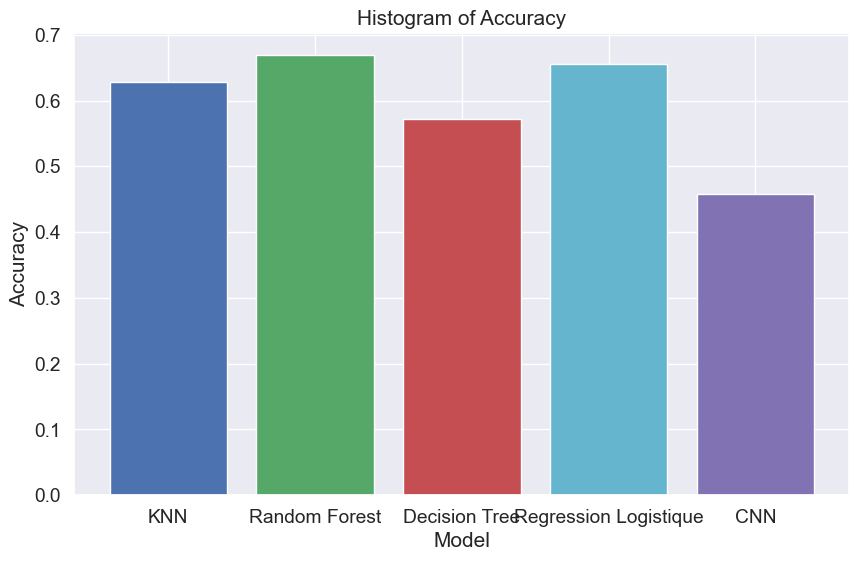

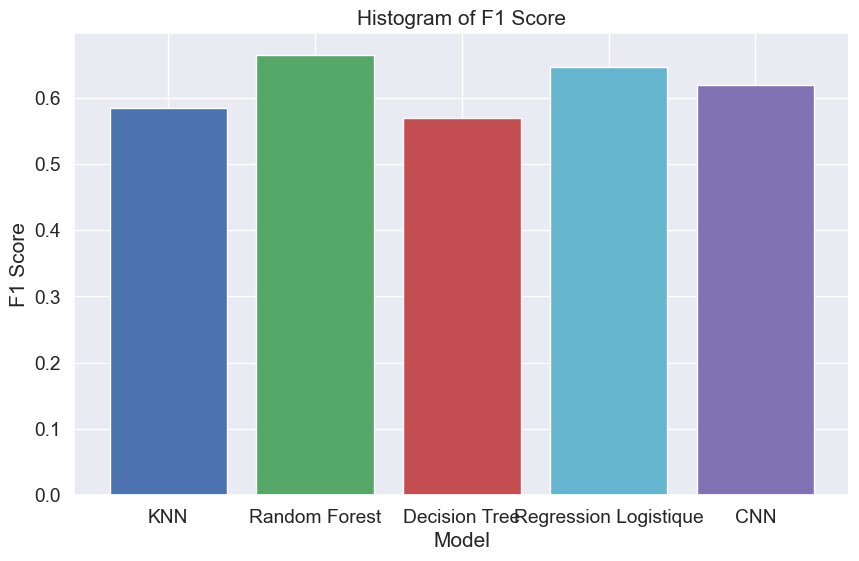

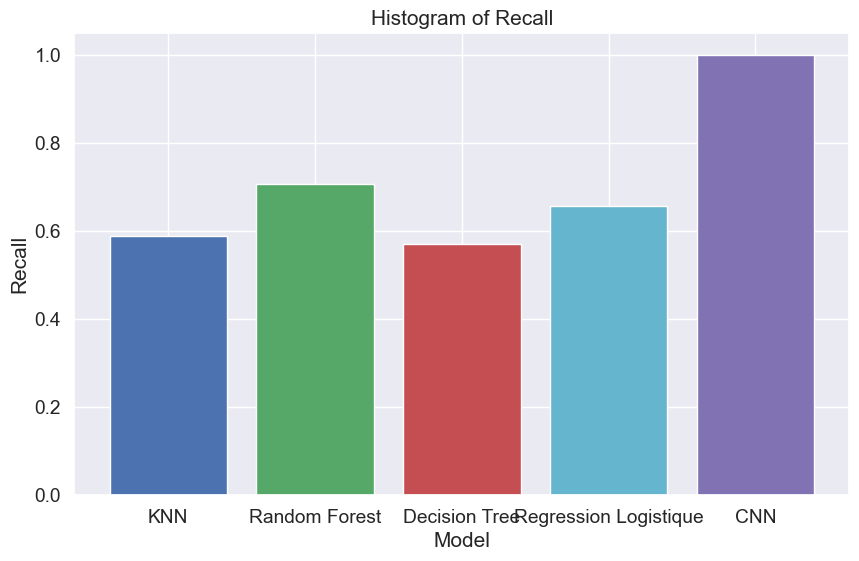

In [9]:
import matplotlib.pyplot as plt

# Store the data in dictionaries
accuracy = {
    'KNN': 0.6277336814328532,
    'Random Forest': 0.6688152074032706,
    'Decision Tree': 0.5716856358614139,
    'Regression Logistique': 0.6553263491540755,
    'CNN': 0.4586004536915449
}

f1_score = {
    'KNN': 0.5841262641573868,
    'Random Forest': 0.6640387490236446,
    'Decision Tree': 0.5687089599830902,
    'Regression Logistique': 0.6461033839191462,
    'CNN': 0.6185387649567299
}

recall = {
    'KNN': 0.5900414568861464,
    'Random Forest': 0.7070742733630644,
    'Decision Tree': 0.5713590724861055,
    'Regression Logistique': 0.657989897337598,
    'CNN': 1.0
}

# Define a list of colors
colors = ['b', 'g', 'r', 'c', 'm']

# Create the histogram for accuracy
plt.figure(figsize=(10, 6))
plt.bar(accuracy.keys(), accuracy.values(), color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Histogram of Accuracy')
plt.show()

# Create the histogram for F1 score
plt.figure(figsize=(10, 6))
plt.bar(f1_score.keys(), f1_score.values(), color=colors)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Histogram of F1 Score')
plt.show()

# Create the histogram for recall
plt.figure(figsize=(10, 6))
plt.bar(recall.keys(), recall.values(), color=colors)
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Histogram of Recall')
plt.show()

## Tester notre modèle sur une image de Pokemon

In [ ]:
import random as rd

dfFusion = pd.read_csv('fusions.csv')
pathsFinal = dfFusion['Filepath'].tolist()
selectRowsWhereFilepath = lambda x: dfFusion[dfFusion['Filepath'] == x]
try:
    dfFinal = pd.concat([selectRowsWhereFilepath(filepath) for filepath in pathsFinal])
except:
    print("Error: One or more filepaths not found in dataset")
dfFinal.to_csv('fusionFinal.csv', index=False)
df_type2 = dfFinal[dfFinal['Type 2'].notna()].copy()
df_type2['Type 1'] = df_type2['Type 2']
try:

    dfFinal = pd.concat([dfFinal, df_type2])
except:
    print("Error: One or more filepaths not found in dataset")

dfFinal = dfFinal.drop(['Type 2'], axis=1)
print(dfFinal)

show_images(pathsFinal)

X_final = np.array([load_and_preprocess_image(filepath) for filepath in dfFinal['Filepath']])
Y_final = dfFinal['Type 1']


In [ ]:
k = -1


imageAtest = X_final[k].reshape(1,128,128,3)
#get row k for the image to test
pokemon = dfFinal.iloc[k]
imageLie = pokemon['Filepath']
# Replace 'pokemon_name' with the name of the Pokemon you are interested in
pokemon_name = pokemon['nom']


show_images([imageLie])


AllPredictionsOVA = {typeCombo: modelsOvA[typeCombo]['model'].predict(imageAtest) for typeCombo in modelsOvA.keys()}

AllPredictionsOVO = {typeCombo: modelsOVO[typeCombo]['model'].predict(imageAtest) for typeCombo in modelsOVO.keys()}



# Prediction Pour OVO

['Bug', 'Dark', 'Dragon', 'Electric']


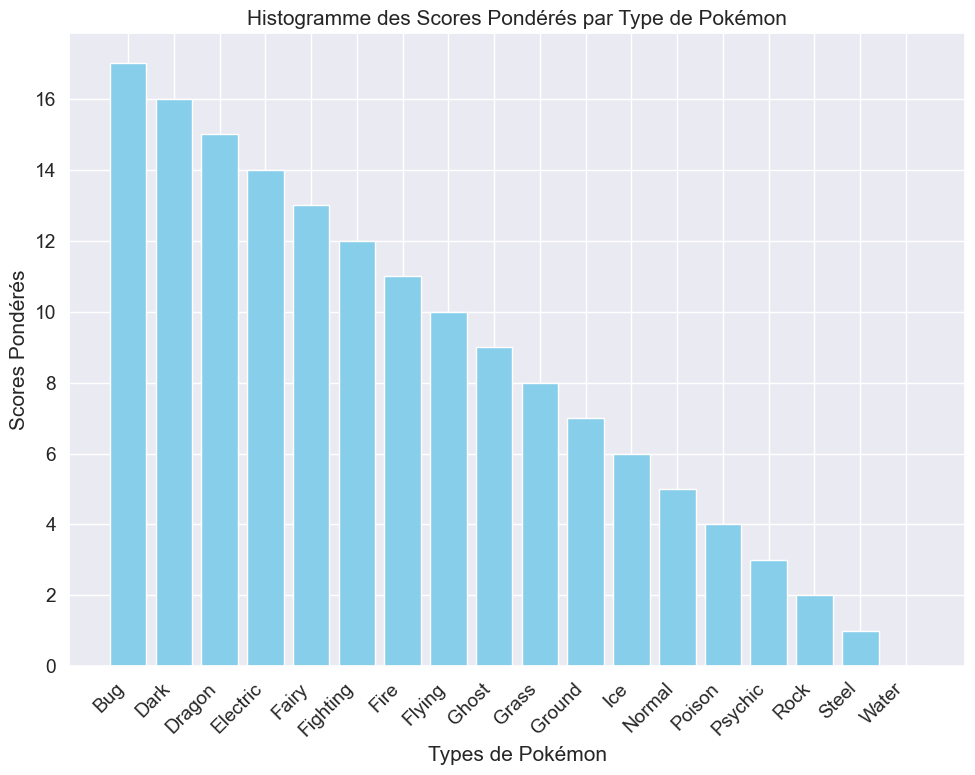

In [28]:

# Initialize score dictionaries
win_scores = {t: 0 for t in types}
weighted_scores = {t: 0 for t in types}

# For each type combination
for typeCombo, predictions in AllPredictionsOVO.items():
    type1, type2 = typeCombo.split('_')
    prob_type1 = predictions[0][0]  # Prendre la première probabilité
    prob_type2 = 1 - prob_type1      # Calculer la probabilité pour l'autre classe

    # Compare the probabilities and increment the win score for the winning type
    if prob_type1 > prob_type2:
        win_scores[type1] += 1
        weighted_scores[type1] += prob_type1
    elif prob_type2 > prob_type1:
        win_scores[type2] += 1
        weighted_scores[type2] += prob_type2

#print(win_scores)
#print(weighted_scores)

# Get the 3 types with the highest win score
top_types = sorted(weighted_scores, key=win_scores.get, reverse=True)[:4]
print(top_types)

sorted_types = sorted(weighted_scores, key=weighted_scores.get, reverse=True)
sorted_scores = [weighted_scores[t] for t in sorted_types]

# Créer l'histogramme
plt.figure(figsize=(10, 8))
plt.bar(sorted_types, sorted_scores, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Types de Pokémon')
plt.ylabel('Scores Pondérés')
plt.title('Histogramme des Scores Pondérés par Type de Pokémon')
plt.tight_layout()  
plt.show()

# Predictions Pour OVA

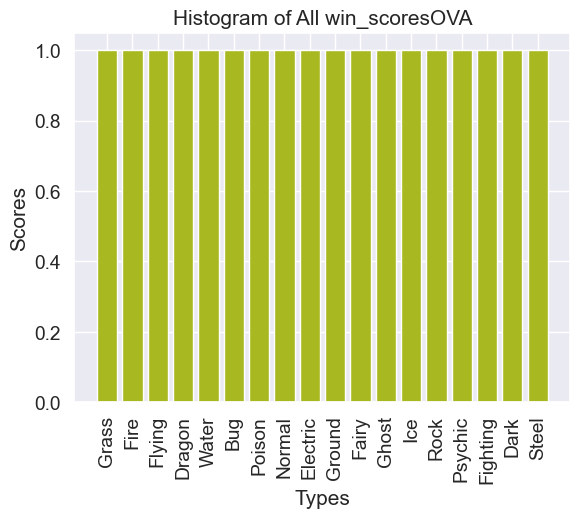

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Get the scores for all types
win_scoresOVA = {t:0 for t in types}

for typeCombo, predictions in AllPredictionsOVA.items():
    prob_type1 = predictions[0]
    win_scoresOVA[typeCombo] =  prob_type1

# Get the values from the dictionary and convert numpy arrays of length 1 to scalars
scores = [s.item() if isinstance(s, np.ndarray) and s.size == 1 else s for s in win_scoresOVA.values()]

# Get the types
types = list(win_scoresOVA.keys())

# Plot the histogram
plt.bar(types, scores)
plt.xlabel('Types')
plt.ylabel('Scores')
plt.title('Histogram of All win_scoresOVA')
plt.xticks(rotation='vertical')
plt.show()

# Résultats du Model OVA

Average Accuracy: 0.4586004536915449
Average F1 Score: 0.6185387649567299
Average Recall: 1.0
Lowest Accuracy: Ghost_Water (0.18803419172763824)
Lowest Recall: Flying_Water (1.0)
Lowest F1 Score: Ghost_Water (0.3165467381477356)
{'Grass': 0.4558196839164285, 'Fire': 0.46829404375132394, 'Flying': 0.49235546238282146, 'Dragon': 0.43174029097837563, 'Water': 0.30673182098304524, 'Bug': 0.5469391398570117, 'Poison': 0.47479834276087146, 'Normal': 0.4069581601549597, 'Electric': 0.4411099623231327, 'Ground': 0.4657627326600692, 'Fairy': 0.4138949907877866, 'Ghost': 0.47119951949400063, 'Ice': 0.5003307172480751, 'Rock': 0.48513079566114087, 'Psychic': 0.4411743090433233, 'Fighting': 0.45226410381934223, 'Dark': 0.45946022517540874, 'Steel': 0.5408438654506907}
{'Grass': 1.0, 'Fire': 1.0, 'Flying': 1.0, 'Dragon': 1.0, 'Water': 1.0, 'Bug': 1.0, 'Poison': 1.0, 'Normal': 1.0, 'Electric': 1.0, 'Ground': 1.0, 'Fairy': 1.0, 'Ghost': 1.0, 'Ice': 1.0, 'Rock': 1.0, 'Psychic': 1.0, 'Fighting': 1.0, '

Text(0.5, 1.0, 'Mean F1 Score for each Type')

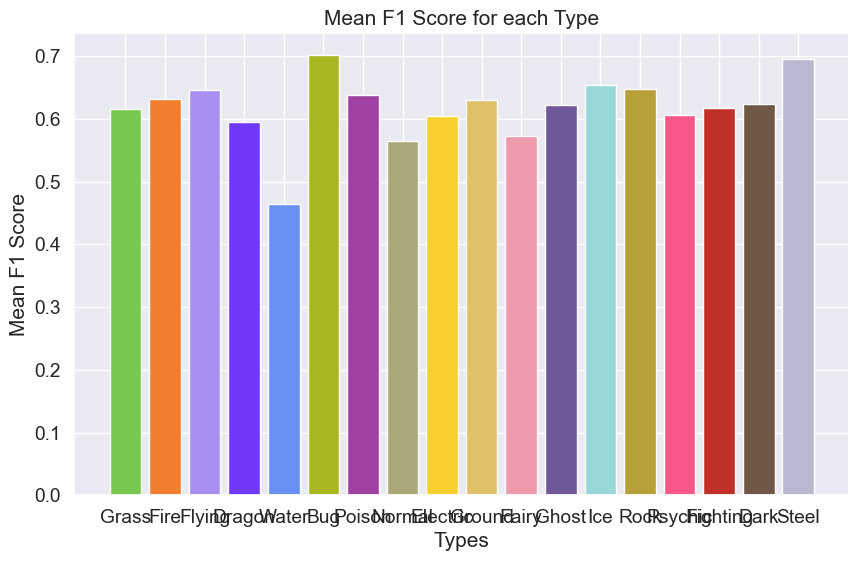

In [22]:
AccuracyMean = np.mean([modelsOVO[typeCombo]['accuracy_score'] for typeCombo in modelsOVO.keys()])
F1Mean = np.mean([modelsOVO[typeCombo]['f1_score'] for typeCombo in modelsOVO.keys()])
RecallMean = np.mean([modelsOVO[typeCombo]['Recall'] for typeCombo in modelsOVO.keys()])
print(f'Average Accuracy: {AccuracyMean}')
print(f'Average F1 Score: {F1Mean}')
print(f'Average Recall: {RecallMean}')

#lowest accuracy recall and f1 score with label :
lowest_accuracy = min(modelsOVO, key=lambda x: modelsOVO[x]['accuracy_score'])
lowest_recall = min(modelsOVO, key=lambda x: modelsOVO[x]['Recall'])
lowest_f1 = min(modelsOVO, key=lambda x: modelsOVO[x]['f1_score'])
print(f'Lowest Accuracy: {lowest_accuracy} ({modelsOVO[lowest_accuracy]["accuracy_score"]})')
print(f'Lowest Recall: {lowest_recall} ({modelsOVO[lowest_recall]["Recall"]})')
print(f'Lowest F1 Score: {lowest_f1} ({modelsOVO[lowest_f1]["f1_score"]})')

#mean accuracy for each type :
mean_accuracy = {type1: np.mean([modelsOVO[typeCombo]['accuracy_score'] for typeCombo in modelsOVO.keys() if type1 in typeCombo]) for type1 in types}
print(mean_accuracy)
# mean recall for each type
mean_recall = {type1: np.mean([modelsOVO[typeCombo]['Recall'] for typeCombo in modelsOVO.keys() if type1 in typeCombo]) for type1 in types}
print(mean_recall)
# mean f1 score for each type
mean_f1 = {type1: np.mean([modelsOVO[typeCombo]['f1_score'] for typeCombo in modelsOVO.keys() if type1 in typeCombo]) for type1 in types}
print(mean_f1)

#histogram of mean accuracy for each type
plt.figure(figsize=(10, 6))
plt.bar(mean_f1.keys(), mean_f1.values(), color=[custom_colors[t] for t in mean_f1.keys()])
plt.xlabel('Types')
plt.ylabel('Mean F1 Score')
plt.title('Mean F1 Score for each Type')

